# H- continuum

ExoJAX supports the H- continuum. The H- continuum is an important continuum opacity under high-temperature hydrogen atmospheres, such as those of ultra-hot Jupiters. Currently, the model by John (1988) is adopted. [OpaHminus](../exojax/exojax.spec.html#exojax.spec.opacont.OpaHminus) class is available.

In [2]:
from exojax.opacity import OpaHminus
from exojax.utils.grids import wavenumber_grid
N=10000
nu_grid, wav, res = wavenumber_grid(9000.0, 18000.0, N, xsmode="premodit", unit="AA")
opa = OpaHminus(nu_grid)
    

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: xsmode=premodit
The wavenumber grid should be in ascending order.
The users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order


/home/kawahara/exojax/src/exojax/utils.grids.py:63: UserWarning: Both input wavelength and output wavenumber are in ascending order.
  warnings.warn(
/home/kawahara/exojax/src/exojax/utils/grids.py:144: UserWarning: Resolution may be too small. R=14425.507713848727
  warnings.warn("Resolution may be too small. R=" + str(resolution), UserWarning)


The logarithmic absorption coefficient can be calculated using `opa.logahminus_matrix`. For an example with WASP-33b, please refer to [this resource](https://github.com/HajimeKawahara/exojax/issues/94#issuecomment-1034576068).


In [5]:
import jax.numpy as jnp
Tarr = jnp.array([2500.0,3000.0, 3500])
a = opa.logahminus_matrix(Tarr, 1.0, 1.0)

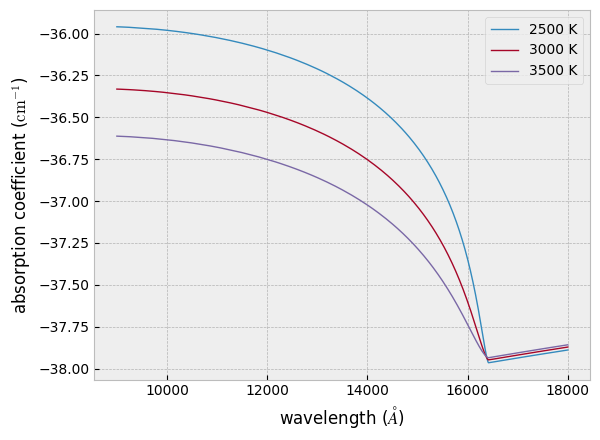

In [8]:
import matplotlib.pyplot as plt

plt.style.use("bmh")
for i in range(0, len(Tarr)):
    plt.plot(wav, a[i, :], lw=1, label=str(int(Tarr[i])) + " K")
plt.xlabel("wavelength ($\\AA$)")
plt.ylabel("absorption coefficient ($\mathrm{cm}^{-1}$)")
plt.legend()
plt.show()